# TP4 Deep Learning NLP :
> Ce TP est effectué par :
**Sandra Mourali** **Anas Chaibi** **Salma Ghabri** **Aziz Bellaaj**
---

# Imports :

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import GRU
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import MaxPooling1D
from numpy import array
from numpy import asarray
from numpy import zeros


# Text Pre-processing :

In [2]:
def preprocess_text(sen):
 # Removing html tags
 sentence = remove_tags(sen)
 # Remove punctuations and numbers
 sentence = re.sub('[^a-zA-Z]', ' ', sentence)
 # Single character removal
 sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
 # Removing multiple spaces
 sentence = re.sub(r'\s+', ' ', sentence)
 return sentence


TAG_RE = re.compile(r'<[^>]+>')


def remove_tags(text):
 return TAG_RE.sub('', text)

In [3]:
! wget https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv

--2024-05-03 23:50:28--  https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66212309 (63M) [text/plain]
Saving to: ‘IMDB-Dataset.csv’

IMDB-Dataset.csv    100%[===================>]  63.14M   147MB/s    in 0.4s    

2024-05-03 23:50:30 (147 MB/s) - ‘IMDB-Dataset.csv’ saved [66212309/66212309]



In [4]:
movie_reviews=pd.read_csv('/content/IMDB-Dataset.csv')
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


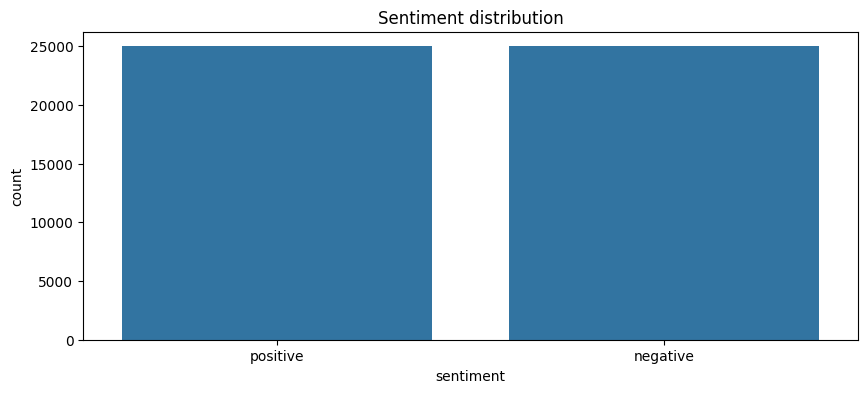

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.countplot(data=movie_reviews, x="sentiment")
plt.title("Sentiment distribution")
plt.show()

In [6]:
movie_reviews.isna().sum()

review       0
sentiment    0
dtype: int64

In [7]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
  X.append(preprocess_text(sen))

In [8]:
X[0]

'One of the other reviewers has mentioned that after watching just Oz episode you ll be hooked They are right as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to many Aryans Muslims gangstas Latinos Christians Italians Irish and more so scuffles death stares dodgy dealings and shady agreements are never far away would say the main appeal of the show is due to the fact that it goes where other shows wouldn dare Forget pretty picture

In [9]:
type(X[0]),len(X[0])

(str, 1653)

In [10]:
y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [11]:
y[:5]

array([1, 1, 1, 0, 1])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.20, random_state=42)

In [13]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [14]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'of': 3,
 'to': 4,
 'is': 5,
 'it': 6,
 'in': 7,
 'this': 8,
 'that': 9,
 'was': 10,
 'as': 11,
 'movie': 12,
 'for': 13,
 'with': 14,
 'but': 15,
 'film': 16,
 'you': 17,
 'on': 18,
 'not': 19,
 'are': 20,
 'he': 21,
 'his': 22,
 'have': 23,
 'one': 24,
 'be': 25,
 'all': 26,
 'at': 27,
 'they': 28,
 'by': 29,
 'an': 30,
 'who': 31,
 'so': 32,
 'from': 33,
 'like': 34,
 'there': 35,
 'or': 36,
 'just': 37,
 'her': 38,
 'out': 39,
 'about': 40,
 'if': 41,
 'has': 42,
 'what': 43,
 'some': 44,
 'good': 45,
 'can': 46,
 'more': 47,
 'very': 48,
 'when': 49,
 'she': 50,
 'up': 51,
 'no': 52,
 'time': 53,
 'my': 54,
 'even': 55,
 'would': 56,
 'which': 57,
 'story': 58,
 'only': 59,
 'really': 60,
 'see': 61,
 'their': 62,
 'had': 63,
 'me': 64,
 'well': 65,
 'we': 66,
 'were': 67,
 'than': 68,
 'much': 69,
 'bad': 70,
 'been': 71,
 'get': 72,
 'do': 73,
 'people': 74,
 'great': 75,
 'other': 76,
 'also': 77,
 'will': 78,
 'into': 79,
 'how': 80,
 'because': 81,
 'do

In [15]:
len(tokenizer.word_index)

92546

In [16]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [17]:
vocab_size

92547

In [18]:
X_train[0]

array([   4,    1,  296,  140, 2854,    2,  405,  614,    1,  263,    5,
       3514,  977,    4,   25,   37,   11, 1237,  215,   62,    2,   35,
          5,   27,  217,   24,  189, 1430,    7, 1068,   15, 4868,   81,
          1,  221,   63,  351,   64,   52,   24,    4, 3547,   13,    6,
         19,  192,    4,  859, 3430, 1720,   17,   23,    4,  158,  194,
        175,  106,    9, 1604,  461,   71,  218,    4,  321,    2, 3431,
         31,   20,   47,   68, 1844, 4668,   11,    6, 1365,    8,   16,
          5, 3475, 1990,   14,   59,    1, 2380,  460,  518,    2,  170,
       2524, 2698, 1745,    4,  573,    6,   33,    1, 3750,  198,  345,
       3812], dtype=int32)

In [19]:
X_train[0].shape

(100,)

In [20]:
import os
import urllib.request
 #request to get the glove file from colab

In [21]:
urllib.request.urlretrieve('https://nlp.stanford.edu/data/glove.6B.zip','glove.6B.zip')
#get the glove file

('glove.6B.zip', <http.client.HTTPMessage at 0x79d586045ab0>)

In [22]:
!unzip "/content/glove.6B.zip" -d "/content/"
#unzip the glove file to get the files .txt

Archive:  /content/glove.6B.zip
  inflating: /content/glove.6B.50d.txt  
  inflating: /content/glove.6B.100d.txt  
  inflating: /content/glove.6B.200d.txt  
  inflating: /content/glove.6B.300d.txt  


# Embeddings :

In [23]:
from numpy import array
from numpy import asarray
from numpy import zeros
embeddings_dictionary = dict()
glove_file = open("glove.6B.100d.txt", encoding="utf8")
for line in glove_file:
  records = line.split()
  word = records[0]
  vector_dimensions = asarray(records[1:],dtype='float32')
  embeddings_dictionary [word] = vector_dimensions
glove_file.close()


In [24]:
embeddings_dictionary
#show the embedding_dictionnary: each word and its embedding

{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [25]:
len(embeddings_dictionary),type(embeddings_dictionary)
#dictionnary of 400000 and its embeddings

(400000, dict)

In [26]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
  embedding_vector = embeddings_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix[index] = embedding_vector

In [27]:
embedding_matrix.shape

(92547, 100)

In [28]:
embedding_matrix[:5]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

## Models :

In [29]:
model=Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix],input_length=maxlen , trainable=False))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          9254700   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1)                 10001     
                                                                 
Total params: 9264701 (35.34 MB)
Trainable params: 10001 (39.07 KB)
Non-trainable params: 9254700 (35.30 MB)
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
history=model.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 3s 4ms/step - loss: 0.6038 - accuracy: 0.6713 - val_loss: 0.5358 - val_accuracy: 0.7341
Epoch 2/6
250/250 [==============================] - 1s 4ms/step - loss: 0.4998 - accuracy: 0.7615 - val_loss: 0.5235 - val_accuracy: 0.7391
Epoch 3/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4620 - accuracy: 0.7843 - val_loss: 0.5173 - val_accuracy: 0.7465
Epoch 4/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4432 - accuracy: 0.7933 - val_loss: 0.5237 - val_accuracy: 0.7452
Epoch 5/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4222 - accuracy: 0.8084 - val_loss: 0.5243 - val_accuracy: 0.7458
Epoch 6/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4077 - accuracy: 0.8161 - val_loss: 0.5451 - val_accuracy: 0.7365


In [33]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.5516 - accuracy: 0.7343
Test Score: 0.5516291856765747
Test Accuracy: 0.7343000173568726


In [34]:
history.history

{'loss': [0.6038466095924377,
  0.49977147579193115,
  0.46195852756500244,
  0.4432302713394165,
  0.42220404744148254,
  0.40769845247268677],
 'accuracy': [0.6713125109672546,
  0.7615000009536743,
  0.7842812538146973,
  0.7932812571525574,
  0.8084062337875366,
  0.8160937428474426],
 'val_loss': [0.5357763767242432,
  0.5234943628311157,
  0.5172514915466309,
  0.5237240791320801,
  0.5242940187454224,
  0.5450916886329651],
 'val_accuracy': [0.734125018119812,
  0.7391250133514404,
  0.7465000152587891,
  0.7452499866485596,
  0.7457500100135803,
  0.7365000247955322]}

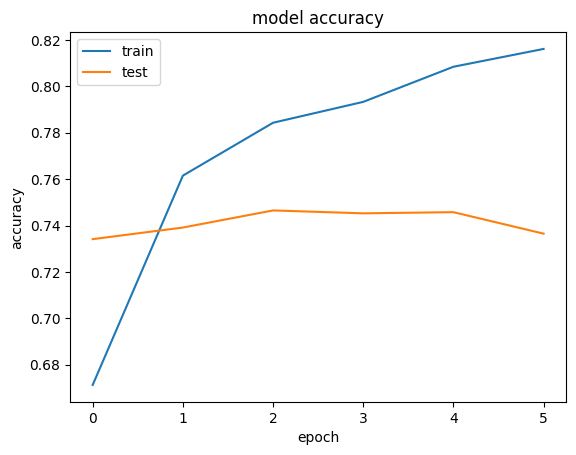

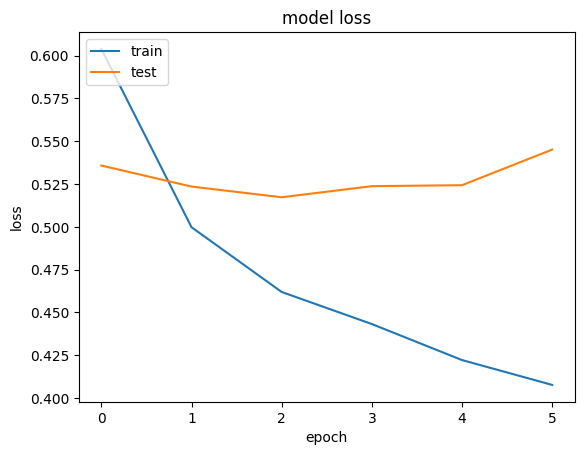

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


In [36]:
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',patience=3)

In [37]:
history_early_stop=model.fit(X_train,y_train,epochs=6,batch_size=128,
                             verbose=1,validation_split=0.2,callbacks=[es])
#only 4 epochs

Epoch 1/6
250/250 [==============================] - 1s 5ms/step - loss: 0.3975 - accuracy: 0.8219 - val_loss: 0.5397 - val_accuracy: 0.7433
Epoch 2/6
250/250 [==============================] - 1s 5ms/step - loss: 0.3909 - accuracy: 0.8248 - val_loss: 0.5436 - val_accuracy: 0.7426
Epoch 3/6
250/250 [==============================] - 1s 5ms/step - loss: 0.3892 - accuracy: 0.8255 - val_loss: 0.5826 - val_accuracy: 0.7253
Epoch 4/6
250/250 [==============================] - 1s 4ms/step - loss: 0.3785 - accuracy: 0.8315 - val_loss: 0.5621 - val_accuracy: 0.7329


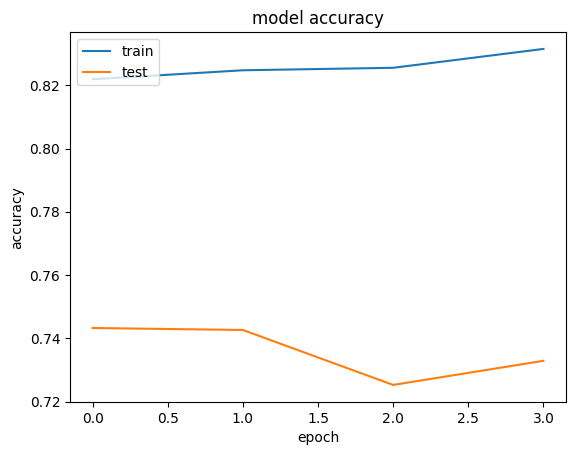

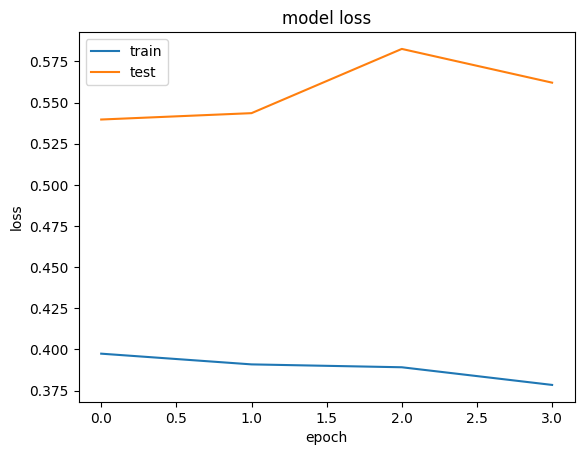

In [38]:
plt.plot(history_early_stop.history['accuracy'])
plt.plot(history_early_stop.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history_early_stop.history['loss'])
plt.plot(history_early_stop.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [39]:
model_2=Sequential()
model_2.add(Embedding(vocab_size, 100, weights=[embedding_matrix],input_length=maxlen , trainable=False))
model_2.add(Conv1D(128,5,activation='relu'))
model_2.add(GlobalMaxPooling1D())
model_2.add(Dense(1,activation='sigmoid'))

In [40]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          9254700   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9318957 (35.55 MB)
Trainable params: 64257 (251.00 KB)
Non-trainable params: 9254700 (35.30 MB)
_________________________________________________________________


In [41]:
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
history_2=model_2.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 5s 8ms/step - loss: 0.5113 - accuracy: 0.7463 - val_loss: 0.3964 - val_accuracy: 0.8230
Epoch 2/6
250/250 [==============================] - 1s 5ms/step - loss: 0.3752 - accuracy: 0.8326 - val_loss: 0.3674 - val_accuracy: 0.8360
Epoch 3/6
250/250 [==============================] - 1s 4ms/step - loss: 0.3212 - accuracy: 0.8648 - val_loss: 0.3548 - val_accuracy: 0.8422
Epoch 4/6
250/250 [==============================] - 1s 4ms/step - loss: 0.2839 - accuracy: 0.8843 - val_loss: 0.3422 - val_accuracy: 0.8459
Epoch 5/6
250/250 [==============================] - 1s 4ms/step - loss: 0.2448 - accuracy: 0.9054 - val_loss: 0.3380 - val_accuracy: 0.8503
Epoch 6/6
250/250 [==============================] - 1s 5ms/step - loss: 0.2171 - accuracy: 0.9213 - val_loss: 0.3407 - val_accuracy: 0.8476


In [43]:
score_2 = model_2.evaluate(X_test, y_test, verbose=0)
print("Test Score:", score_2[0])
print("Test Accuracy:", score_2[1])

Test Score: 0.3432674705982208
Test Accuracy: 0.8478000164031982


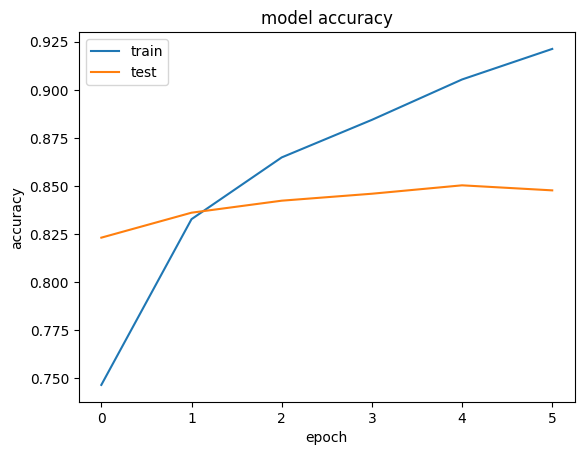

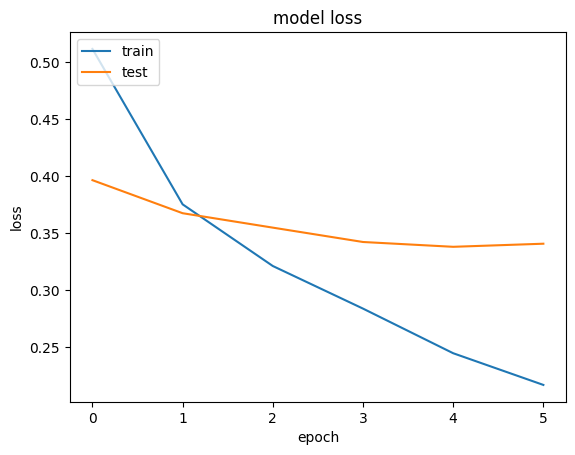

In [44]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [45]:
model_3=Sequential()
model_3.add(Embedding(vocab_size, 100, weights=[embedding_matrix],input_length=maxlen , trainable=False))
model_3.add(LSTM(128))
model_3.add(Dense(1,activation='sigmoid'))

In [46]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          9254700   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9372077 (35.75 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 9254700 (35.30 MB)
_________________________________________________________________


In [47]:
model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [48]:
history_3=model_3.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 8s 19ms/step - loss: 0.5377 - accuracy: 0.7237 - val_loss: 0.4566 - val_accuracy: 0.7856
Epoch 2/6
250/250 [==============================] - 4s 15ms/step - loss: 0.4501 - accuracy: 0.7907 - val_loss: 0.4086 - val_accuracy: 0.8124
Epoch 3/6
250/250 [==============================] - 4s 16ms/step - loss: 0.4036 - accuracy: 0.8173 - val_loss: 0.3853 - val_accuracy: 0.8253
Epoch 4/6
250/250 [==============================] - 3s 11ms/step - loss: 0.3810 - accuracy: 0.8278 - val_loss: 0.3661 - val_accuracy: 0.8380
Epoch 5/6
250/250 [==============================] - 2s 8ms/step - loss: 0.3490 - accuracy: 0.8463 - val_loss: 0.3474 - val_accuracy: 0.8455
Epoch 6/6
250/250 [==============================] - 2s 9ms/step - loss: 0.3299 - accuracy: 0.8572 - val_loss: 0.3425 - val_accuracy: 0.8515


In [49]:
score_3 = model_3.evaluate(X_test, y_test, verbose=0)
print("Test Score:", score_3[0])
print("Test Accuracy:", score_3[1])

Test Score: 0.33998578786849976
Test Accuracy: 0.8514000177383423


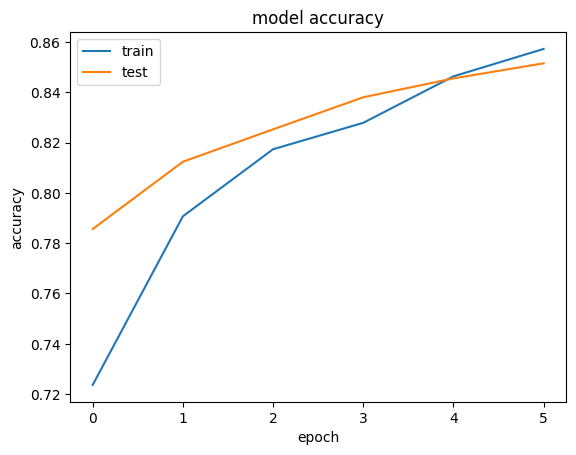

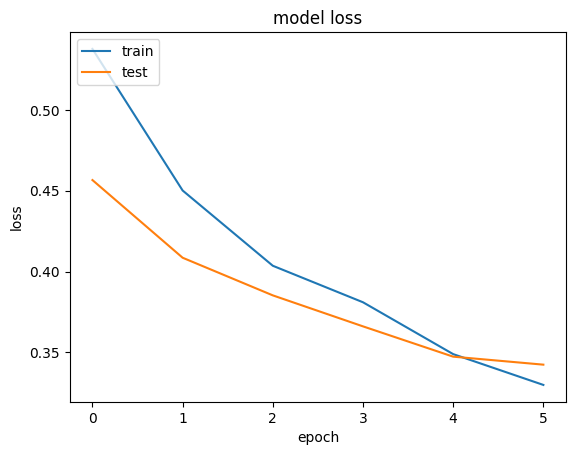

In [50]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

**3)Comparer les résultats des 3 classifieurs**
On a LSTM accuracy=0.84 == CNN accuracy=0.84 mais le 1er modéle accuracy=0.74 donc on a bien besoin des Special layers comme LSTM,CONVOULTION,GRU ect (les modéles simples avec seulement Dense layers ont des valeurs d'accuracies faibles).

**4)Choisir une instance aléatoirement et donner sa polarité.**

In [53]:
inp=tokenizer.texts_to_sequences(['good morning'])
inp=pad_sequences(inp,maxlen=maxlen,padding='post')
result=model_2.predict(inp)

1/1 [==============================] - 0s 328ms/step


In [55]:
result[0][0]

0.52183634

In [56]:
round(result[0][0])

1

## Homework :


#### GRU Model :

In [105]:
gru_model=Sequential()
gru_model.add(Embedding(vocab_size, 100, weights=[embedding_matrix],input_length=maxlen , trainable=False))
gru_model.add(GRU(128))
gru_model.add(Dense(1,activation='sigmoid'))
gru_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=gru_model.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)

ValueError: Layer embedding_8 weight shape (92547, 100) is not compatible with provided weight shape (92547, 300).

In [59]:
gru_model.evaluate(X_test, y_test, verbose=0)

[0.3209294378757477, 0.8626000285148621]

#### CNN+LSTM Model

In [62]:
cnn_lstm_model=Sequential()
cnn_lstm_model.add(Embedding(vocab_size, 100, weights=[embedding_matrix],input_length=maxlen , trainable=False))
cnn_lstm_model.add(Conv1D(128,5,activation='relu'))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(LSTM(128))
cnn_lstm_model.add(Dense(1,activation='sigmoid'))
cnn_lstm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_lstm_history=cnn_lstm_model.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)


Epoch 1/6
250/250 [==============================] - 11s 27ms/step - loss: 0.5359 - accuracy: 0.7247 - val_loss: 0.4457 - val_accuracy: 0.7929
Epoch 2/6
250/250 [==============================] - 3s 14ms/step - loss: 0.4044 - accuracy: 0.8184 - val_loss: 0.4283 - val_accuracy: 0.7974
Epoch 3/6
250/250 [==============================] - 3s 12ms/step - loss: 0.3461 - accuracy: 0.8490 - val_loss: 0.3556 - val_accuracy: 0.8428
Epoch 4/6
250/250 [==============================] - 3s 12ms/step - loss: 0.3155 - accuracy: 0.8660 - val_loss: 0.3935 - val_accuracy: 0.8280
Epoch 5/6
250/250 [==============================] - 3s 12ms/step - loss: 0.2731 - accuracy: 0.8864 - val_loss: 0.3599 - val_accuracy: 0.8504
Epoch 6/6
250/250 [==============================] - 3s 11ms/step - loss: 0.2522 - accuracy: 0.8968 - val_loss: 0.3767 - val_accuracy: 0.8410


In [65]:
cnn_lstm_model.evaluate(X_test, y_test, verbose=0)

[0.3654854893684387, 0.8409000039100647]


### Création des 3 modèles: lstm , GRU and RNN+CNN

> RQ: dans le cas de glove embedding, on utilisé 100 donc embedding matrix de shape (100,) mais dans Fasttext et Word2vec, on a trouvé des embeddings de shape (300,) donc on a modifié le Embedding layer comme suit: le 2nd param est 300
Dans chaque embedding on va:
* importer le embedding
* créer le embedding_matrix
* utiliser les fonctions pour créer les 3 modéles LSTM,GRU et CNN+LSTM
* évauluer ces modéles avec la fonction `evaluate_model(model)`
* tracer les courbes avec la fonction `plot_results(history)`

###  Define the models, evaluation and plotting functions :

In [66]:
def lstm_model():
  model=Sequential()
  model.add(Embedding(vocab_size, 300, weights=[embedding_matrix],input_length=maxlen , trainable=False))
  model.add(LSTM(128))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  history=model.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)
  return model,history

In [67]:
def gru_model():
  model=Sequential()
  model.add(Embedding(vocab_size, 300, weights=[embedding_matrix],input_length=maxlen , trainable=False))
  model.add(GRU(128))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  history=model.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)
  return model,history

In [68]:
from keras.layers import MaxPooling1D
def cnn_lstm_model():
  model=Sequential()
  model.add(Embedding(vocab_size, 300, weights=[embedding_matrix],input_length=maxlen , trainable=False))
  model.add(Conv1D(128,5,activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(LSTM(128))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  history=model.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)


  return model,history

In [69]:
def evaluate_model(model):
  score = model.evaluate(X_test, y_test, verbose=0)
  print("Test Score:", score[0])
  print("Test Accuracy:", score[1])

In [70]:
def plot_results(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()

### FASTTEXT Embeddings :

In [71]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.vec

--2024-05-04 00:03:37--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.162.163.51, 3.162.163.11, 3.162.163.34, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.162.163.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6597238061 (6.1G) [binary/octet-stream]
Saving to: ‘wiki.en.vec’

wiki.en.vec         100%[===================>]   6.14G  83.0MB/s    in 64s     

2024-05-04 00:04:41 (98.6 MB/s) - ‘wiki.en.vec’ saved [6597238061/6597238061]



In [72]:
from tqdm import tqdm
import os, re, csv, math, codecs
print('loading word embeddings...')
embeddings_dictionary = {}
f = codecs.open('wiki.en.vec', encoding='utf-8')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_dictionary[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_dictionary))

loading word embeddings...


2519428it [07:50, 5356.86it/s]

found 2519396 word vectors


In [73]:
embeddings_dictionary.get('word')#example

array([-2.3880e-01,  5.6796e-02, -1.0488e-02,  1.3781e-01, -8.2600e-02,
        3.1404e-02, -3.9842e-01, -2.6896e-01,  3.7160e-01, -1.9283e-01,
       -4.3051e-04,  4.0367e-02, -5.3095e-02, -6.3550e-02, -5.8880e-02,
       -8.2725e-02,  2.4586e-02,  8.2131e-02,  2.4972e-01,  2.7800e-01,
       -9.9849e-02,  2.0151e-02,  9.3349e-02, -1.4366e-01, -1.1492e-01,
        1.6466e-01,  1.2376e-01, -1.2143e-01, -1.3769e-01, -2.7514e-02,
       -1.7194e-01,  2.2446e-01, -1.9723e-01,  8.9918e-02, -5.9078e-02,
       -1.6751e-01,  2.2000e-01, -2.2967e-02,  1.6223e-01,  1.8255e-01,
        1.9329e-01,  4.6305e-02, -3.2150e-02, -9.9097e-02, -1.3969e-01,
        5.5528e-02,  7.8791e-02, -3.6829e-01, -7.3294e-02, -1.5062e-01,
        7.2895e-02, -1.0371e-02,  2.3583e-01, -6.4098e-02, -3.1150e-01,
       -1.0131e-01, -6.3332e-02,  1.0034e-02,  2.3156e-01,  2.4181e-02,
        2.0607e-01,  1.4892e-01, -9.6264e-02,  6.7597e-02, -2.7025e-02,
       -4.3566e-02,  2.3367e-01,  1.7091e-01,  7.3503e-02,  2.25

In [74]:
type(embeddings_dictionary)

dict

In [75]:
embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        if embedding_vector.shape==(0,):
          continue
        embedding_matrix[index] = embedding_vector
#create the embedding matrix

In [76]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.019238  , -0.19960999,  0.13663   , ..., -0.056779  ,
         0.075279  , -0.081228  ],
       [-0.031533  ,  0.046278  , -0.12534   , ...,  0.11163   ,
        -0.058231  ,  0.011977  ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.056858  ,  0.27686   , -0.031354  , ...,  0.68206   ,
         0.30813   ,  0.58231997],
       [ 0.40314999, -0.13091999, -0.33791   , ...,  0.22762001,
         0.40819001,  0.17526001]])

#### LSTM Model :

In [77]:
lstm_model,lstm_history=lstm_model()

Epoch 1/6
250/250 [==============================] - 10s 19ms/step - loss: 0.4909 - accuracy: 0.7552 - val_loss: 0.3948 - val_accuracy: 0.8217
Epoch 2/6
250/250 [==============================] - 4s 14ms/step - loss: 0.4244 - accuracy: 0.8092 - val_loss: 0.3747 - val_accuracy: 0.8364
Epoch 3/6
250/250 [==============================] - 4s 15ms/step - loss: 0.3786 - accuracy: 0.8318 - val_loss: 0.3618 - val_accuracy: 0.8363
Epoch 4/6
250/250 [==============================] - 3s 14ms/step - loss: 0.3527 - accuracy: 0.8434 - val_loss: 0.4091 - val_accuracy: 0.8123
Epoch 5/6
250/250 [==============================] - 4s 15ms/step - loss: 0.3300 - accuracy: 0.8563 - val_loss: 0.3308 - val_accuracy: 0.8579
Epoch 6/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3061 - accuracy: 0.8679 - val_loss: 0.3278 - val_accuracy: 0.8581


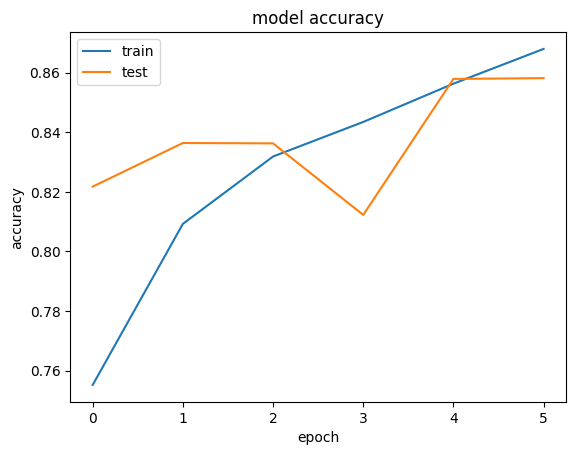

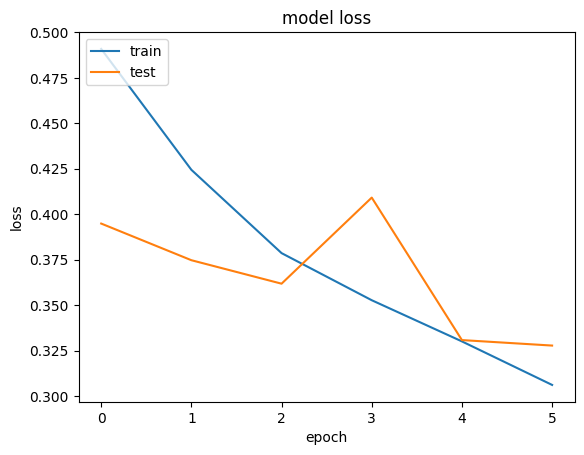

In [78]:
plot_results(lstm_history)

In [79]:
evaluate_model(lstm_model)

Test Score: 0.3213097155094147
Test Accuracy: 0.8569999933242798


#### GRU Model :

In [80]:
gru_model,gru_history=gru_model()

Epoch 1/6
250/250 [==============================] - 9s 17ms/step - loss: 0.5054 - accuracy: 0.7382 - val_loss: 0.3859 - val_accuracy: 0.8273
Epoch 2/6
250/250 [==============================] - 4s 14ms/step - loss: 0.3691 - accuracy: 0.8359 - val_loss: 0.3591 - val_accuracy: 0.8411
Epoch 3/6
250/250 [==============================] - 3s 14ms/step - loss: 0.3357 - accuracy: 0.8519 - val_loss: 0.3470 - val_accuracy: 0.8539
Epoch 4/6
250/250 [==============================] - 4s 16ms/step - loss: 0.3224 - accuracy: 0.8599 - val_loss: 0.3244 - val_accuracy: 0.8631
Epoch 5/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3030 - accuracy: 0.8697 - val_loss: 0.3230 - val_accuracy: 0.8643
Epoch 6/6
250/250 [==============================] - 3s 13ms/step - loss: 0.2880 - accuracy: 0.8777 - val_loss: 0.3153 - val_accuracy: 0.8649


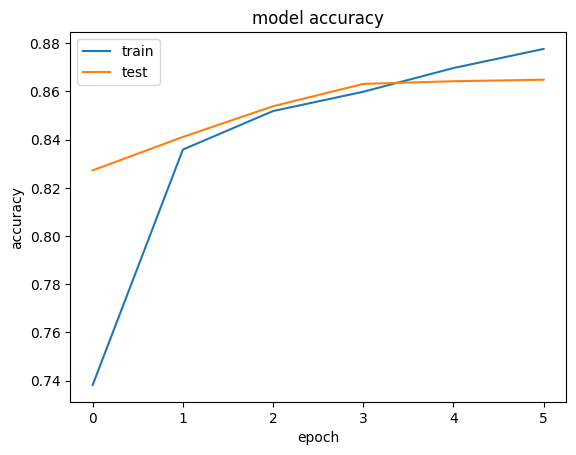

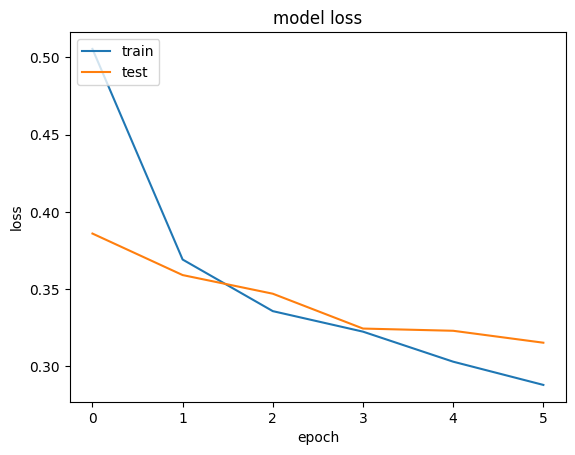

In [81]:
plot_results(gru_history)

In [101]:
evaluate_model(gru_model)

Test Score: 0.30895155668258667
Test Accuracy: 0.864799976348877


#### CNN+LSTM Model :

In [83]:
cnn_lstm_model,cnn_lstm_history=cnn_lstm_model()

Epoch 1/6
250/250 [==============================] - 13s 27ms/step - loss: 0.5134 - accuracy: 0.7367 - val_loss: 0.3803 - val_accuracy: 0.8372
Epoch 2/6
250/250 [==============================] - 4s 14ms/step - loss: 0.3633 - accuracy: 0.8414 - val_loss: 0.3590 - val_accuracy: 0.8401
Epoch 3/6
250/250 [==============================] - 4s 15ms/step - loss: 0.3177 - accuracy: 0.8642 - val_loss: 0.3263 - val_accuracy: 0.8640
Epoch 4/6
250/250 [==============================] - 4s 14ms/step - loss: 0.2725 - accuracy: 0.8875 - val_loss: 0.3347 - val_accuracy: 0.8595
Epoch 5/6
250/250 [==============================] - 3s 14ms/step - loss: 0.2253 - accuracy: 0.9108 - val_loss: 0.3625 - val_accuracy: 0.8554
Epoch 6/6
250/250 [==============================] - 4s 14ms/step - loss: 0.1814 - accuracy: 0.9307 - val_loss: 0.3399 - val_accuracy: 0.8593


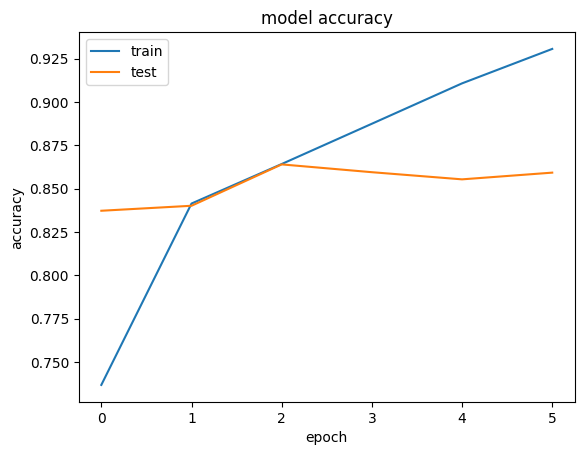

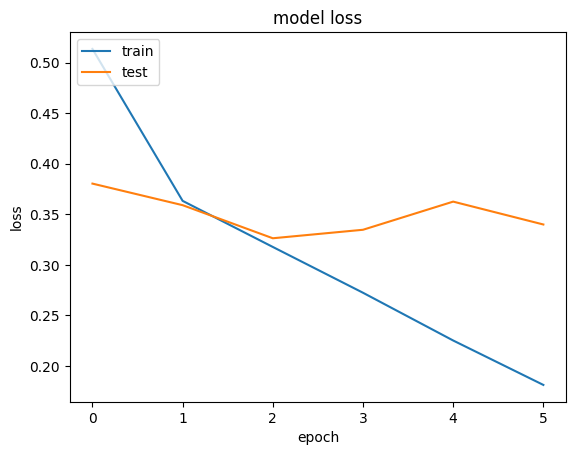

In [84]:
plot_results(cnn_lstm_history)


In [85]:
evaluate_model(cnn_lstm_model)

Test Score: 0.3263453245162964
Test Accuracy: 0.8608999848365784


### WORD2VEC Embeddings :


In [86]:
!wget https://media.githubusercontent.com/media/eyaler/word2vec-slim/master/GoogleNews-vectors-negative300-SLIM.bin.gz


--2024-05-04 00:14:28--  https://media.githubusercontent.com/media/eyaler/word2vec-slim/master/GoogleNews-vectors-negative300-SLIM.bin.gz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276467217 (264M) [application/octet-stream]
Saving to: ‘GoogleNews-vectors-negative300-SLIM.bin.gz’

GoogleNews-vectors- 100%[===================>] 263.66M   168MB/s    in 1.6s    

2024-05-04 00:14:35 (168 MB/s) - ‘GoogleNews-vectors-negative300-SLIM.bin.gz’ saved [276467217/276467217]



In [87]:
!gunzip /content/GoogleNews-vectors-negative300-SLIM.bin.gz


In [102]:
from gensim.models.keyedvectors import KeyedVectors
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
print('loading word2vec model…')
word2vec_model = KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300-SLIM.bin', binary=True)
def getVector(str):
  if str in word2vec_model:
    return word2vec_model[str]
  else:
    return None;
def isInModel(str):
  return str in word2vec_model

loading word2vec model…


In [103]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
  embedding_vector = getVector(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [90]:
len(embedding_matrix)

92547

#### CNN+LSTM MODEL

In [ ]:
cnn_lstm_model,cnn_lstm_history=cnn_lstm_model()

In [ ]:
evaluate_model(cnn_lstm_model)

In [ ]:
plot_results(cnn_lstm_history)

### TF-IDF Embeddings :

The idea is to split X (text) and y and the apply the tfidf with `max_featues=600` to have and input sentence of (1 , 600) shape

#### LSTM MODEL

In [ ]:
lstm_model,lstm_history=lstm_model()

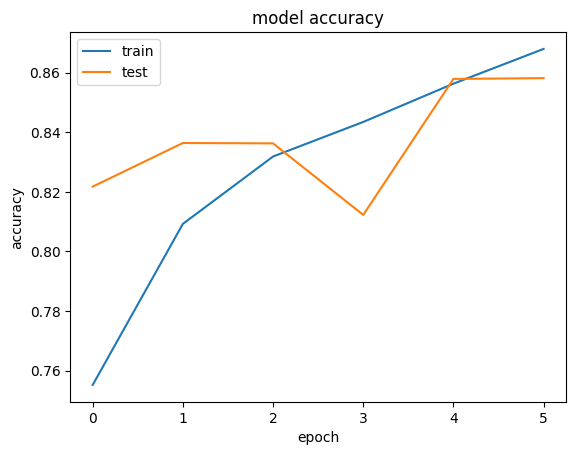

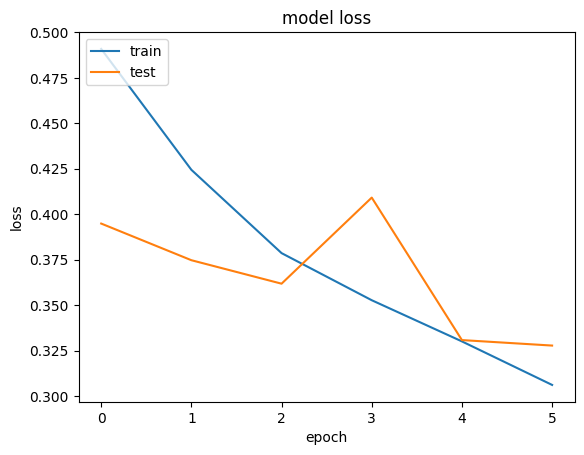

In [94]:
plot_results(lstm_history)

In [95]:
evaluate_model(lstm_model)

Test Score: 0.3213097155094147
Test Accuracy: 0.8569999933242798


In [ ]:
gru_model,gru_history=gru_model()

In [97]:
evaluate_model(gru_model)

Test Score: 0.30895155668258667
Test Accuracy: 0.864799976348877


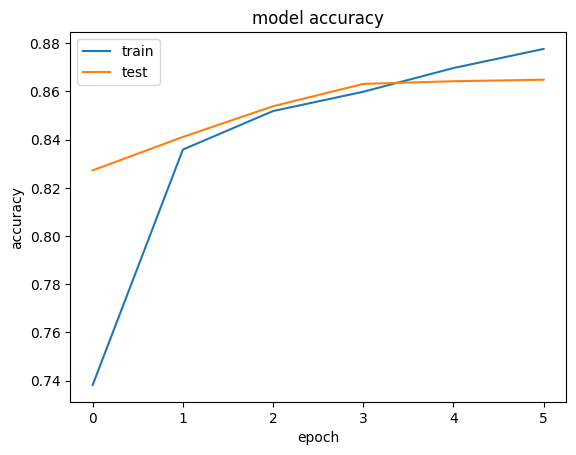

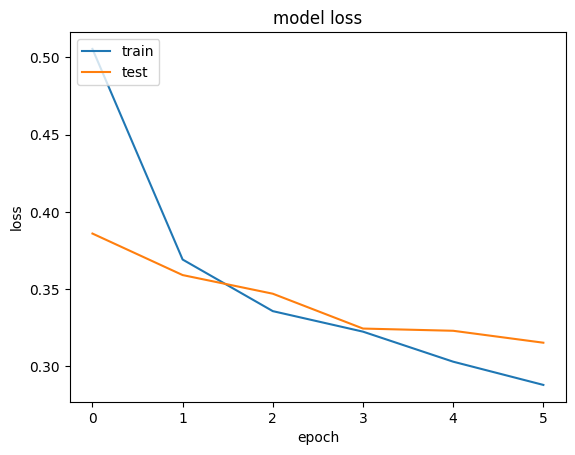

In [98]:
plot_results(gru_history)

In [107]:
X[0]

'One of the other reviewers has mentioned that after watching just Oz episode you ll be hooked They are right as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to many Aryans Muslims gangstas Latinos Christians Italians Irish and more so scuffles death stares dodgy dealings and shady agreements are never far away would say the main appeal of the show is due to the fact that it goes where other shows wouldn dare Forget pretty picture

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2,shuffle=True)

print(len(X_train), len(X_test), len(y_train) + len(y_test))

40000 10000 50000


In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf
# Prepare the data
vectorizer = TfidfVectorizer(max_features =600)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_test)

In [110]:
X_train_tfidf[0].shape

(1, 600)

In [111]:
type(X_train_tfidf) #we need to add the .toarray() method when feeding to the neural network

scipy.sparse._csr.csr_matrix

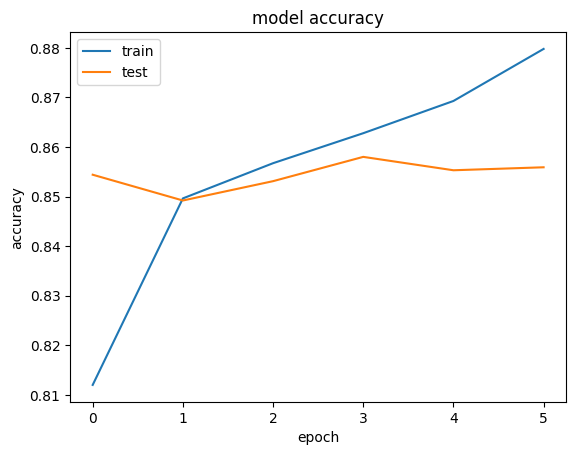

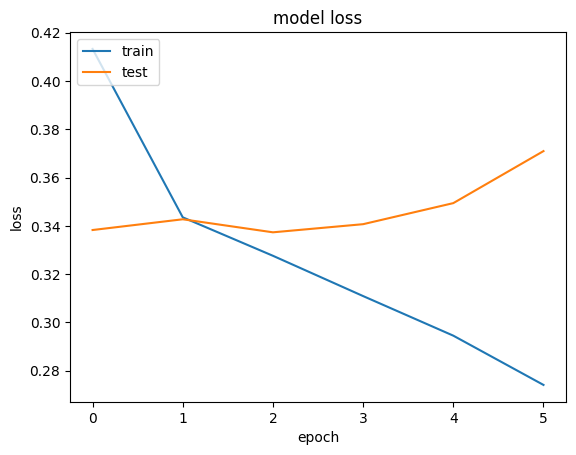

In [114]:
plot_results(lstm_history)

#### LSTM Model

In [112]:
from keras.layers import Reshape
lstm_model = Sequential()
lstm_model.add(Dense(64, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
lstm_model.add(Reshape((64, 1)))  # Add an additional dimension because LSTM requires 3 dimensional input

lstm_model.add(LSTM(128))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile your model
lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train your model
lstm_history = lstm_model.fit(X_train_tfidf.toarray(), y_train, epochs=6,validation_data=(X_val_tfidf.toarray(), y_test))


Epoch 1/6
1250/1250 [==============================] - 35s 23ms/step - loss: 0.4132 - accuracy: 0.8120 - val_loss: 0.3383 - val_accuracy: 0.8544
Epoch 2/6
1250/1250 [==============================] - 22s 18ms/step - loss: 0.3435 - accuracy: 0.8496 - val_loss: 0.3427 - val_accuracy: 0.8492
Epoch 3/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.3276 - accuracy: 0.8567 - val_loss: 0.3373 - val_accuracy: 0.8531
Epoch 4/6
1250/1250 [==============================] - 15s 12ms/step - loss: 0.3109 - accuracy: 0.8628 - val_loss: 0.3407 - val_accuracy: 0.8580
Epoch 5/6
1250/1250 [==============================] - 15s 12ms/step - loss: 0.2945 - accuracy: 0.8693 - val_loss: 0.3494 - val_accuracy: 0.8553
Epoch 6/6
1250/1250 [==============================] - 12s 10ms/step - loss: 0.2741 - accuracy: 0.8798 - val_loss: 0.3709 - val_accuracy: 0.8559


In [113]:
# Evaluate the model
score = lstm_model.evaluate(X_val_tfidf.toarray(), y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])


Validation loss: 0.3709278106689453
Validation accuracy: 0.85589998960495


#### GRU MODEL

#### GRU Model

In [115]:
gru_model = Sequential()
gru_model.add(Dense(64, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
gru_model.add(Reshape((64, 1)))  # Add an additional dimension

gru_model.add(GRU(128))
gru_model.add(Dense(1, activation='sigmoid'))

# Compile your model
gru_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train your model
gru_histoy = gru_model.fit(X_train_tfidf.toarray(), y_train, epochs=6,validation_data=(X_val_tfidf.toarray(), y_test))


Epoch 1/6
1250/1250 [==============================] - 21s 13ms/step - loss: 0.3963 - accuracy: 0.8155 - val_loss: 0.3437 - val_accuracy: 0.8507
Epoch 2/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.3454 - accuracy: 0.8495 - val_loss: 0.3326 - val_accuracy: 0.8531
Epoch 3/6
1250/1250 [==============================] - 15s 12ms/step - loss: 0.3362 - accuracy: 0.8517 - val_loss: 0.3343 - val_accuracy: 0.8538
Epoch 4/6
1250/1250 [==============================] - 14s 12ms/step - loss: 0.3280 - accuracy: 0.8556 - val_loss: 0.3363 - val_accuracy: 0.8526
Epoch 5/6
1250/1250 [==============================] - 15s 12ms/step - loss: 0.3149 - accuracy: 0.8623 - val_loss: 0.3345 - val_accuracy: 0.8514
Epoch 6/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.2960 - accuracy: 0.8709 - val_loss: 0.3387 - val_accuracy: 0.8530


In [116]:
# Evaluate the model
score = gru_model.evaluate(X_val_tfidf.toarray(), y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.3386695683002472
Validation accuracy: 0.8529999852180481


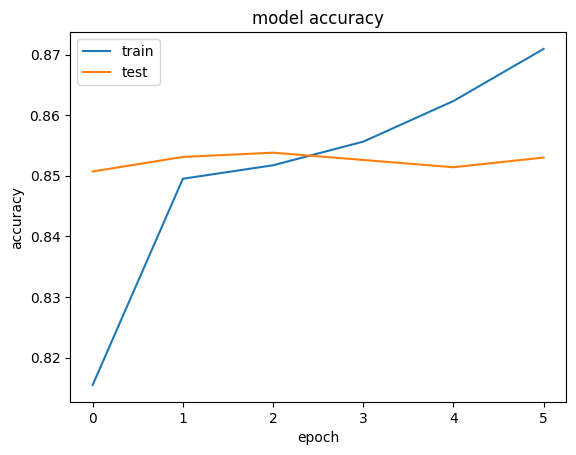

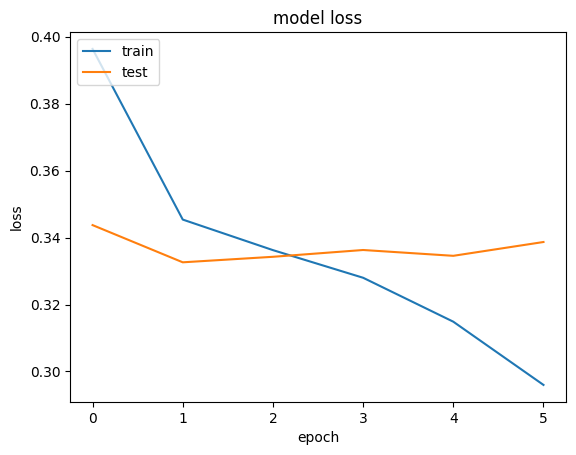

In [117]:
plot_results(gru_histoy)

CNN+LSTM MODEL

In [118]:
cnn_lstm_model = Sequential()
cnn_lstm_model.add(Dense(64, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
cnn_lstm_model.add(Reshape((64, 1)))  # Add an additional dimension
cnn_lstm_model.add(Conv1D(128,5,activation='relu'))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(LSTM(128))
cnn_lstm_model.add(Dense(1,activation='sigmoid'))
cnn_lstm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_lstm_history=cnn_lstm_model.fit(X_train_tfidf.toarray(), y_train, epochs=6,validation_data=(X_val_tfidf.toarray(), y_test))

Epoch 1/6
1250/1250 [==============================] - 24s 14ms/step - loss: 0.3995 - accuracy: 0.8145 - val_loss: 0.3425 - val_accuracy: 0.8535
Epoch 2/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.3339 - accuracy: 0.8544 - val_loss: 0.3433 - val_accuracy: 0.8538
Epoch 3/6
1250/1250 [==============================] - 15s 12ms/step - loss: 0.2987 - accuracy: 0.8721 - val_loss: 0.3403 - val_accuracy: 0.8528
Epoch 4/6
1250/1250 [==============================] - 15s 12ms/step - loss: 0.2591 - accuracy: 0.8899 - val_loss: 0.3880 - val_accuracy: 0.8507
Epoch 5/6
1250/1250 [==============================] - 14s 11ms/step - loss: 0.2219 - accuracy: 0.9101 - val_loss: 0.3803 - val_accuracy: 0.8397
Epoch 6/6
1250/1250 [==============================] - 15s 12ms/step - loss: 0.1885 - accuracy: 0.9273 - val_loss: 0.4381 - val_accuracy: 0.8388


In [119]:
# Evaluate the model
score = cnn_lstm_model.evaluate(X_val_tfidf.toarray(), y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.4381310045719147
Validation accuracy: 0.8388000130653381


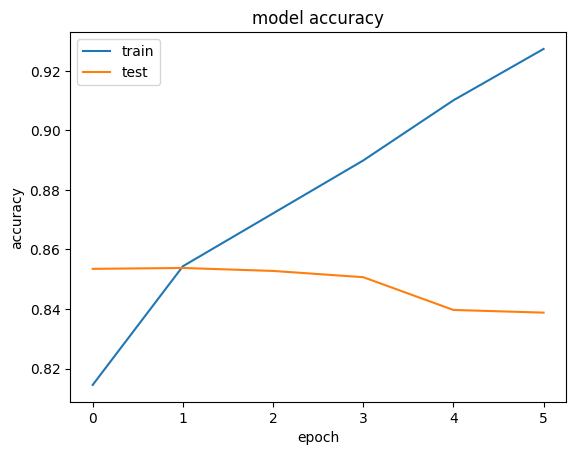

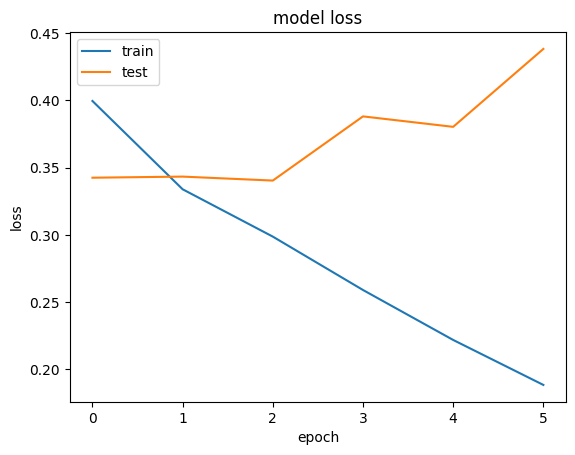

In [120]:
plot_results(cnn_lstm_history)

In [121]:
columns=['GLOVE','FAST_Text','WORD2VEC','TFIDF']
indexes=['LSTM','GRU','CNN+LSTM']

results=pd.DataFrame(index=indexes,columns=columns)

In [122]:
results['GLOVE']= [0.845,	0.861,	0.846]
results['FAST_Text']= [0.849 , 0.867,	0.836]
results['WORD2VEC']= [0.843 ,0.855,  0.862]
results['TFIDF']= [ 0.839 ,0.847,0.842]

In [123]:
results.head()

,GLOVE,FAST_Text,WORD2VEC,TFIDF
LSTM,0.845,0.849,0.843,0.839
GRU,0.861,0.867,0.855,0.847
CNN+LSTM,0.846,0.836,0.862,0.842


### Conclusion :

* On remarque que GRU est le meilleur modéle et ses valeurs de Loss montrent qu'il n'admet pas de overfitting.
* Le CNN+LSTM a fait des surapprentissage sur quelques types de Embedding car on voit la courbe de loss se diminue puis les valeurs de loss augumentent.